# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_pd = pd.merge(study_results, mouse_metadata, on="Mouse ID")
mouse_study_pd.head()
                          

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_no = mouse_study_pd["Mouse ID"].value_counts()
mice_no

Mouse ID
g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: count, Length: 249, dtype: int64

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
#df.set_index(['A', 'B'], inplace=True)

#mouse_study_pd = mouse_study_pd.set_index(["Mouse ID","Timepoint"], inplace=True)
duplicate_rows = mouse_study_pd.loc[mouse_study_pd.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
#duplicate_rows = mouse_study_pd.index.duplicated(keep=False)
#duplicate_rows = mouse_study_pd.duplicated()
#print("Duplicate Rows:")
#print(mouse_study_pd[duplicate_rows])
duplicate_rows

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_clean_pd = mouse_study_pd.drop_duplicates()
mouse_study_clean_pd.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


# Checking the number of mice in the clean DataFrame.
mouse_study_clean_pd.count()

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
#groupby column, use value to mean, median etc... these are arrays not data frames
mouse_study_mean = mouse_study_clean_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_study_median = mouse_study_clean_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_study_var = mouse_study_clean_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_study_std = mouse_study_clean_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_study_sem = mouse_study_clean_pd.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
#mean, median, variance, standard deviation, and SEM of the tumor volume.
#mouse_study_mean = mouse_study_clean_pd.groupby("Drug Regimen").mean() 
#mouse_study_mean
# Assemble the resulting series into a single summary DataFrame.
mouse_study_summ = pd.DataFrame({"Mean Tumor Volume":mouse_study_mean,
                                 "Median Tumor Volume":mouse_study_median,
                                 "Variance Tumor Volume":mouse_study_var,
                                 "STD Tumor Volume":mouse_study_std,
                                 "SEM Tumor Volume":mouse_study_sem})
mouse_study_summ


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_study_summary_stat = mouse_study_clean_pd.groupby("Drug Regimen").agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
mouse_study_summary_stat.head()



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

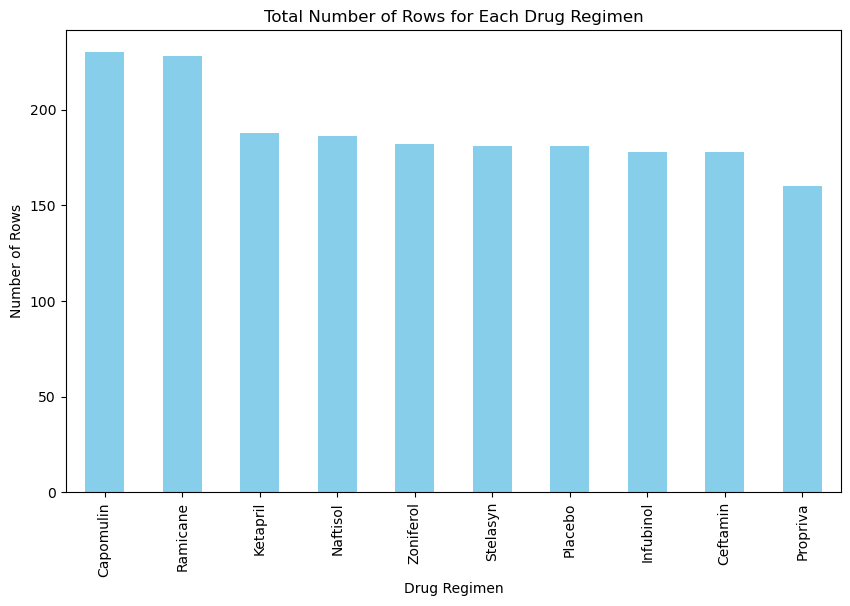

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_mouse_rows = mouse_study_clean_pd["Drug Regimen"].value_counts()
count_mouse_rows.plot(kind='bar', figsize=(10, 6), color='skyblue')
# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

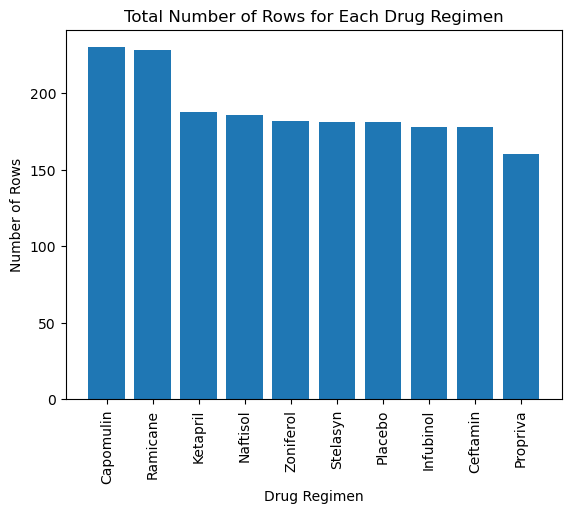

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_mouse_rows = mouse_study_clean_pd["Drug Regimen"].value_counts()
#count_mouse_rows.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.bar(count_mouse_rows.index.values, count_mouse_rows.values)
# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation = 90)

# Show the plot
plt.show()


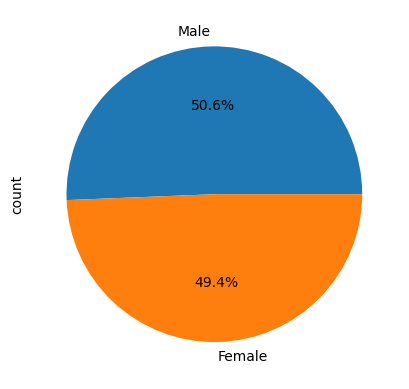

In [14]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
#count_mouse_rows = mouse_study_clean_pd["Sex"].value_counts()
#count_mouse_rows.plot(kind='pie', figsize=(10, 6), color='skyblue')

count_sex_df = mouse_study_clean_pd.loc[:,["Mouse ID", "Sex"]]
count_sex_plot = count_sex_df.Sex.value_counts()
count_sex_plot.plot(kind='pie', autopct='%1.1f%%')
# Show the plot
plt.show()

# Get the unique mice with their gender


# Make the pie chart


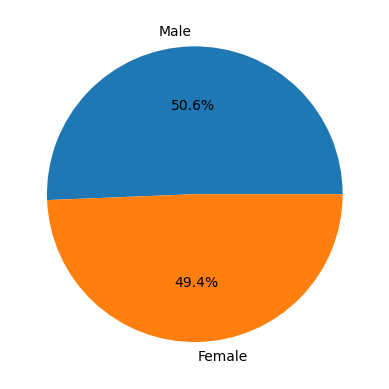

In [15]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
count_sex_df = mouse_study_clean_pd.loc[:,["Mouse ID", "Sex"]]
count_sex_plot = count_sex_df.Sex.value_counts()

# Get the unique mice with their gender
plt.pie(count_sex_plot.values, labels=count_sex_plot.index.values,autopct='%1.1f%%' )

# Make the pie chart
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

filtered_regimens = mouse_study_clean_pd[mouse_study_clean_pd['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = filtered_regimens.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = max_timepoints.merge(mouse_study_clean_pd, on=['Mouse ID','Timepoint'], how='inner')
print(final_tumor_volume)

   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen in treatment_regimens:
    volume = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == regimen, 'Tumor Volume (mm3)'].values[-1]
    
    # Append the final tumor volume for each drug to the empty list
    tumor_volume.append(volume)

    # Determine outliers using upper and lower bounds
lowerq = np.quantile(tumor_volume, 0.25)
upperq = np.quantile(tumor_volume, 0.75) #tumor_volume.quantile[0.75]
iqr = upperq-lowerq

upper_outlier = upperq + 1.5*iqr
lower_outlier = lowerq - 1.5*iqr


TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

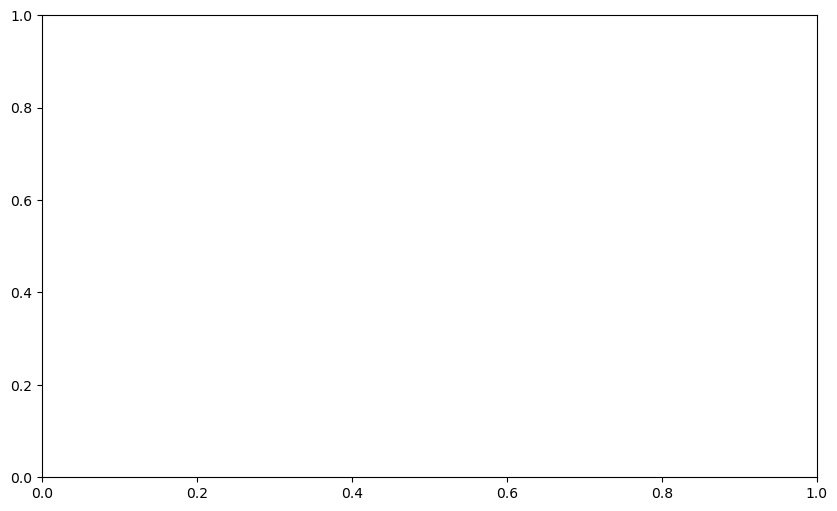

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volume= [31.8962384, 30.63869575]#, 62.75445141, 64.72983655]
#treatment_regimens = ['Capomulin', 'Ramicane']#, 'Infubinol', 'Ceftamin']
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(final_tumor_volume)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume')
plt.show()


## Line and Scatter Plots

The r^2-value is: 0.8951432017496936


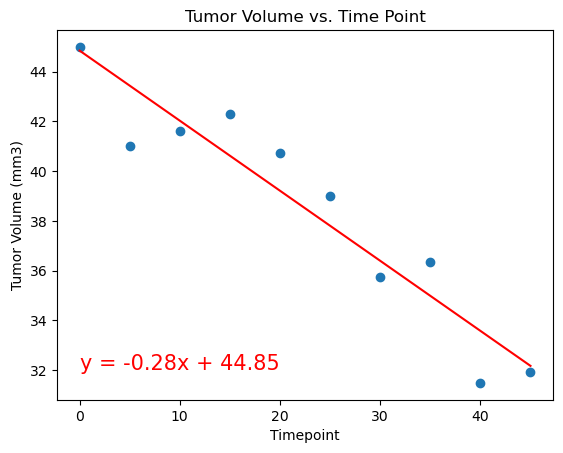

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#y793
mouse_id = 'y793'
treatment = 'Capomulin'

capomulin_mouse = pd.DataFrame(mouse_study_clean_pd.loc[(mouse_study_clean_pd['Drug Regimen'] == treatment) &
                                                        (mouse_study_clean_pd['Mouse ID'] == mouse_id)]).reset_index()
x_values = capomulin_mouse['Timepoint']
y_values = capomulin_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,32),fontsize=15,color="red")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

                                                    

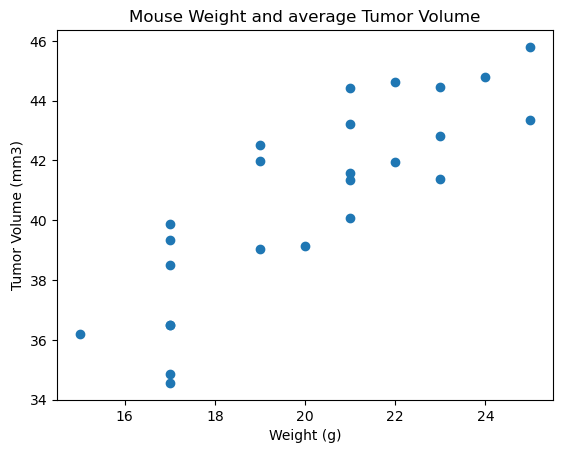

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

mouse_id = 'y793'
treatment = 'Capomulin'

capomulin_mouse = pd.DataFrame(mouse_study_clean_pd.loc[mouse_study_clean_pd['Drug Regimen'] == treatment])
capomulin_avg = capomulin_mouse.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()
capomulin_avg

plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight and average Tumor Volume')

# Show plot
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


In [32]:
correlation = capomulin_avg['Weight (g)'].corr(capomulin_avg['Tumor Volume (mm3)'])
# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])

# Create the regression line
regression_line = slope * capomulin_avg['Weight (g)'] + intercept

print(f"Correlation Coefficient:{correlation}")
print(f"Regression:{regression_line}")



Correlation Coefficient:0.8419363424694722
Regression:0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64
